In [1]:
import os
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
proc_path   = '../data/processed'
raw_path    = '../data/raw'
data_path   = os.environ['DATA_PATH']
data17_path = os.path.join(data_path, 'data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97')
data18_path = os.path.join(data_path, 'data18_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97')
print('raw data path: \n %s' %(data_path))
print('data17 data path: \n %s' %(data17_path))
print('data18 data path: \n %s' %(data18_path))

raw data path: 
 /home/micael/Documents/NeuralRinger/jpsiee_data
data17 data path: 
 /home/micael/Documents/NeuralRinger/jpsiee_data/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97
data18 data path: 
 /home/micael/Documents/NeuralRinger/jpsiee_data/data18_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97


In [3]:
et, eta   = 2, 0
file_name = 'data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97_et%i_eta%i.npz'
f         = dict(np.load(os.path.join(data17_path, file_name %(et, eta))))
data17    = pd.DataFrame(data=f['data'], columns=f['features'])
# add target info
data17['target'] = f['target']

data17.head()

,avgmu,L2Calo_ring_0,L2Calo_ring_1,L2Calo_ring_2,L2Calo_ring_3,L2Calo_ring_4,L2Calo_ring_5,L2Calo_ring_6,L2Calo_ring_7,L2Calo_ring_8,...,deltaE,T0HLTElectronT2CaloTight,T0HLTElectronT2CaloMedium,T0HLTElectronT2CaloLoose,T0HLTElectronT2CaloVLoose,HLT__isLHTight,HLT__isLHMedium,HLT__isLHLoose,HLT__isLHVLoose,target
0,47.509998,1056.258057,322.188080,332.912659,-280.741852,21.125513,-131.229263,-38.171936,-160.671906,1016.838379,...,5007.001953,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1
1,47.450001,870.888245,776.392395,-90.251289,10.248786,568.193481,-63.480675,-62.772644,152.331909,1623.090454,...,6382.289062,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,35.820339,554.257324,91.470505,-232.490112,-146.808426,-1.804339,-119.220062,-381.634277,49.214310,987.953186,...,5909.175781,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,35.820339,704.402771,407.674438,688.304016,376.865265,-3.415975,247.710114,22.180048,171.543243,2058.773682,...,7770.158203,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,34.590000,969.125366,545.412903,-202.046585,-72.834450,-324.668976,237.151871,-154.877655,-175.607117,1428.432373,...,3861.644531,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [4]:
# remove events with pile up > 75
print('dataframe size: %i' %(len(data17)))
m_df = data17[data17.avgmu <= 75.].copy()
print('dataframe size after remove pile up measure errors: %i' %(len(m_df)))

dataframe size: 248554
dataframe size after remove pile up measure errors: 248484


In [5]:
sgn_df = m_df[m_df.target == 1].copy()

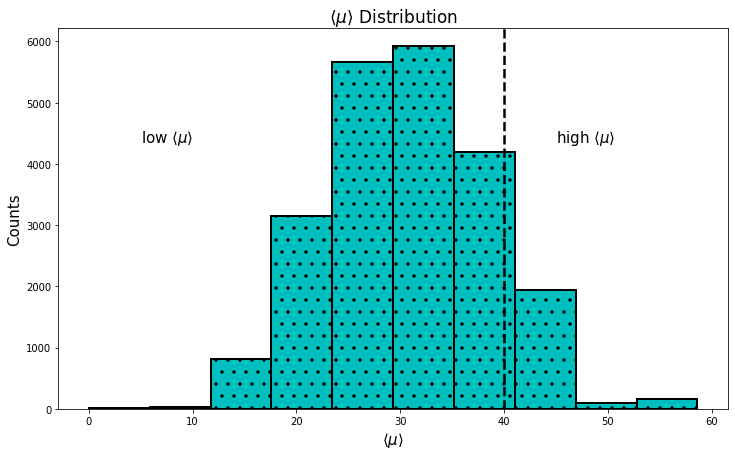

In [6]:

ax = sgn_df.avgmu.hist(histtype='bar', linewidth=2, facecolor='c', 
         hatch='.', edgecolor='k',fill=True, figsize=(12,7))
ax.grid(False)
ax.axvline(x=40, color='black', ls='--', lw=2.5)
ax.text(x=45, y=0.7*(ax.get_ylim()[1]), s=r'high $\langle \mu \rangle$', fontsize=15)
ax.text(x=5, y=0.7*(ax.get_ylim()[1]), s=r'low $\langle \mu \rangle$', fontsize=15)
ax.set_title(r'$\langle \mu \rangle$ Distribution', fontsize=17)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel(r'$\langle \mu \rangle$', fontsize=15)
plt.savefig(os.path.join(proc_path, 'mu_hist.png'), dpi=150)

In [7]:
cols_    = ['avgmu'] + ['L2Calo_ring_%i' %(iring) for iring in range(100)] + ['eratio', 'rhad', 'reta']
aux_cols = ['L2Calo_ring_%i' %(iring) for iring in range(100)] + ['eratio', 'rhad', 'reta']
sgn_df[cols_].head()

,avgmu,L2Calo_ring_0,L2Calo_ring_1,L2Calo_ring_2,L2Calo_ring_3,L2Calo_ring_4,L2Calo_ring_5,L2Calo_ring_6,L2Calo_ring_7,L2Calo_ring_8,...,L2Calo_ring_93,L2Calo_ring_94,L2Calo_ring_95,L2Calo_ring_96,L2Calo_ring_97,L2Calo_ring_98,L2Calo_ring_99,eratio,rhad,reta
0,47.509998,1056.258057,322.188080,332.912659,-280.741852,21.125513,-131.229263,-38.171936,-160.671906,1016.838379,...,149.337540,538.579468,-87.871071,-16.027462,19.823441,23.619419,-60.313873,0.834254,-0.008132,0.984048
1,47.450001,870.888245,776.392395,-90.251289,10.248786,568.193481,-63.480675,-62.772644,152.331909,1623.090454,...,167.304718,527.542175,402.801208,0.000000,-18.532923,619.032043,-33.661842,0.911199,-0.008566,0.922361
2,35.820339,554.257324,91.470505,-232.490112,-146.808426,-1.804339,-119.220062,-381.634277,49.214310,987.953186,...,63.989880,643.590210,2510.474854,20.586887,-17.645905,-7.352460,-36.272137,0.897669,0.009347,0.990073
3,35.820339,704.402771,407.674438,688.304016,376.865265,-3.415975,247.710114,22.180048,171.543243,2058.773682,...,172.060684,1435.549927,381.634186,0.000000,-104.401352,24.360315,76.063843,0.981134,-0.007949,0.910635
4,34.590000,969.125366,545.412903,-202.046585,-72.834450,-324.668976,237.151871,-154.877655,-175.607117,1428.432373,...,-28.192223,329.424194,2.703364,0.000000,18.991985,24.135649,185.586105,0.943548,0.000382,1.099629


In [8]:
trn_data = sgn_df[cols_].copy()
trn_data.head()

,avgmu,L2Calo_ring_0,L2Calo_ring_1,L2Calo_ring_2,L2Calo_ring_3,L2Calo_ring_4,L2Calo_ring_5,L2Calo_ring_6,L2Calo_ring_7,L2Calo_ring_8,...,L2Calo_ring_93,L2Calo_ring_94,L2Calo_ring_95,L2Calo_ring_96,L2Calo_ring_97,L2Calo_ring_98,L2Calo_ring_99,eratio,rhad,reta
0,47.509998,1056.258057,322.188080,332.912659,-280.741852,21.125513,-131.229263,-38.171936,-160.671906,1016.838379,...,149.337540,538.579468,-87.871071,-16.027462,19.823441,23.619419,-60.313873,0.834254,-0.008132,0.984048
1,47.450001,870.888245,776.392395,-90.251289,10.248786,568.193481,-63.480675,-62.772644,152.331909,1623.090454,...,167.304718,527.542175,402.801208,0.000000,-18.532923,619.032043,-33.661842,0.911199,-0.008566,0.922361
2,35.820339,554.257324,91.470505,-232.490112,-146.808426,-1.804339,-119.220062,-381.634277,49.214310,987.953186,...,63.989880,643.590210,2510.474854,20.586887,-17.645905,-7.352460,-36.272137,0.897669,0.009347,0.990073
3,35.820339,704.402771,407.674438,688.304016,376.865265,-3.415975,247.710114,22.180048,171.543243,2058.773682,...,172.060684,1435.549927,381.634186,0.000000,-104.401352,24.360315,76.063843,0.981134,-0.007949,0.910635
4,34.590000,969.125366,545.412903,-202.046585,-72.834450,-324.668976,237.151871,-154.877655,-175.607117,1428.432373,...,-28.192223,329.424194,2.703364,0.000000,18.991985,24.135649,185.586105,0.943548,0.000382,1.099629


# Create a dataset with low pileup

In [9]:
low_mu_data = trn_data[trn_data.avgmu <= 40].copy()
low_mu_data.to_csv(os.path.join(raw_path, 'low_mu_data17_trn_data.csv'), index=False)

In [11]:
cond_array = np.tile(low_mu_data.loc[:, ['avgmu']].values, (1, 104))
low_mu_cond_df = pd.DataFrame(data=cond_array, columns=low_mu_data.columns)
low_mu_cond_df.to_csv(os.path.join(raw_path, 'cond_low_mu_data17_trn_data.csv'), index=False)

# Create a dataset with high pileup

In [12]:
high_mu_data = trn_data[trn_data.avgmu > 40].copy()
high_mu_data.to_csv(os.path.join(raw_path, 'high_mu_data17_trn_data.csv'), index=False)

In [13]:
cond_array = np.tile(high_mu_data.loc[:, ['avgmu']].values, (1, 104))
high_mu_cond_df = pd.DataFrame(data=cond_array, columns=high_mu_data.columns)
high_mu_cond_df.to_csv(os.path.join(raw_path, 'cond_high_mu_data17_trn_data_only_rings.csv'), index=False)

# Create a aux data to use in incremental training

This data will be create using a another energy particion in order to not need to flip the data.

In [14]:
et, eta   = 0, 0
file_name = 'data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97_et%i_eta%i.npz'
f         = dict(np.load(os.path.join(data17_path, file_name %(et, eta))))
data17    = pd.DataFrame(data=f['data'], columns=f['features'])
# add target info
data17['target'] = f['target']

data17.head()

,avgmu,L2Calo_ring_0,L2Calo_ring_1,L2Calo_ring_2,L2Calo_ring_3,L2Calo_ring_4,L2Calo_ring_5,L2Calo_ring_6,L2Calo_ring_7,L2Calo_ring_8,...,deltaE,T0HLTElectronT2CaloTight,T0HLTElectronT2CaloMedium,T0HLTElectronT2CaloLoose,T0HLTElectronT2CaloVLoose,HLT__isLHTight,HLT__isLHMedium,HLT__isLHLoose,HLT__isLHVLoose,target
0,35.820339,759.815491,289.027832,639.944336,341.532257,-221.836151,-108.763718,-253.796890,-372.599701,905.396912,...,2554.924316,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,34.540001,127.047821,594.189697,-70.757294,-21.670483,-192.265991,201.423706,-368.936920,252.256119,287.833435,...,2346.461182,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1
2,34.490002,249.316666,-101.766212,-347.571960,38.529026,247.290375,-173.332413,-34.682064,-4.046615,513.669250,...,3801.666992,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,34.439999,323.627014,283.367188,-45.295769,-471.503601,30.063107,157.632507,580.815857,452.537018,643.664307,...,3636.305664,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1
4,34.389999,89.940178,27.550495,-405.034790,-156.880905,564.956177,-171.184891,-220.175766,12.746792,716.418823,...,4281.824707,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [15]:
# remove events with pile up > 75
print('dataframe size: %i' %(len(data17)))
m_df = data17[data17.avgmu <= 75.].copy()
print('dataframe size after remove pile up measure errors: %i' %(len(m_df)))

dataframe size: 233460
dataframe size after remove pile up measure errors: 233397


In [16]:
sgn_df = m_df[m_df.target == 1].copy()

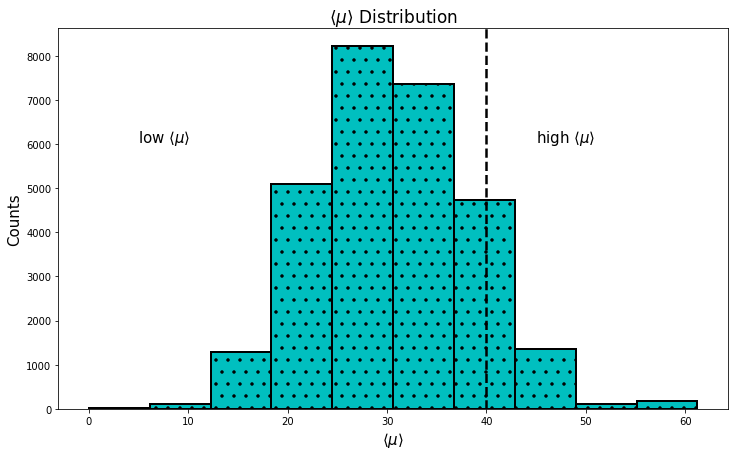

In [17]:

ax = sgn_df.avgmu.hist(histtype='bar', linewidth=2, facecolor='c', 
         hatch='.', edgecolor='k',fill=True, figsize=(12,7))
ax.grid(False)
ax.axvline(x=40, color='black', ls='--', lw=2.5)
ax.text(x=45, y=0.7*(ax.get_ylim()[1]), s=r'high $\langle \mu \rangle$', fontsize=15)
ax.text(x=5, y=0.7*(ax.get_ylim()[1]), s=r'low $\langle \mu \rangle$', fontsize=15)
ax.set_title(r'$\langle \mu \rangle$ Distribution', fontsize=17)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel(r'$\langle \mu \rangle$', fontsize=15)
plt.savefig(os.path.join(proc_path, 'aux_data_mu_hist.png'), dpi=150)

In [18]:
cols_    = ['avgmu'] + ['L2Calo_ring_%i' %(iring) for iring in range(100)] + ['eratio', 'rhad', 'reta']
aux_cols = ['L2Calo_ring_%i' %(iring) for iring in range(100)] + ['eratio', 'rhad', 'reta']
sgn_df[cols_].head()

,avgmu,L2Calo_ring_0,L2Calo_ring_1,L2Calo_ring_2,L2Calo_ring_3,L2Calo_ring_4,L2Calo_ring_5,L2Calo_ring_6,L2Calo_ring_7,L2Calo_ring_8,...,L2Calo_ring_93,L2Calo_ring_94,L2Calo_ring_95,L2Calo_ring_96,L2Calo_ring_97,L2Calo_ring_98,L2Calo_ring_99,eratio,rhad,reta
0,35.820339,759.815491,289.027832,639.944336,341.532257,-221.836151,-108.763718,-253.796890,-372.599701,905.396912,...,68.920624,-31.178379,923.812805,0.000000,-45.224316,-8.963378,464.058502,0.989367,-0.012832,0.823958
1,34.540001,127.047821,594.189697,-70.757294,-21.670483,-192.265991,201.423706,-368.936920,252.256119,287.833435,...,178.488235,333.243958,89.491333,0.000000,4.973924,38.299217,-22.382658,1.000000,0.080973,0.906119
2,34.490002,249.316666,-101.766212,-347.571960,38.529026,247.290375,-173.332413,-34.682064,-4.046615,513.669250,...,-147.329453,-32.185822,-29.012571,-15.262623,-24.050194,-62.900505,25.437704,0.925220,-0.012446,0.875594
3,34.439999,323.627014,283.367188,-45.295769,-471.503601,30.063107,157.632507,580.815857,452.537018,643.664307,...,101.852013,-33.621052,-296.656342,-0.490164,-20.586887,-7.352460,0.490164,0.809286,0.046279,0.854803
4,34.389999,89.940178,27.550495,-405.034790,-156.880905,564.956177,-171.184891,-220.175766,12.746792,716.418823,...,106.886124,286.285278,415.302032,-24.975201,7.400060,160.951294,-8.787571,0.968477,-0.011660,1.004701


In [19]:
trn_data = sgn_df[cols_].copy()
trn_data.head()

,avgmu,L2Calo_ring_0,L2Calo_ring_1,L2Calo_ring_2,L2Calo_ring_3,L2Calo_ring_4,L2Calo_ring_5,L2Calo_ring_6,L2Calo_ring_7,L2Calo_ring_8,...,L2Calo_ring_93,L2Calo_ring_94,L2Calo_ring_95,L2Calo_ring_96,L2Calo_ring_97,L2Calo_ring_98,L2Calo_ring_99,eratio,rhad,reta
0,35.820339,759.815491,289.027832,639.944336,341.532257,-221.836151,-108.763718,-253.796890,-372.599701,905.396912,...,68.920624,-31.178379,923.812805,0.000000,-45.224316,-8.963378,464.058502,0.989367,-0.012832,0.823958
1,34.540001,127.047821,594.189697,-70.757294,-21.670483,-192.265991,201.423706,-368.936920,252.256119,287.833435,...,178.488235,333.243958,89.491333,0.000000,4.973924,38.299217,-22.382658,1.000000,0.080973,0.906119
2,34.490002,249.316666,-101.766212,-347.571960,38.529026,247.290375,-173.332413,-34.682064,-4.046615,513.669250,...,-147.329453,-32.185822,-29.012571,-15.262623,-24.050194,-62.900505,25.437704,0.925220,-0.012446,0.875594
3,34.439999,323.627014,283.367188,-45.295769,-471.503601,30.063107,157.632507,580.815857,452.537018,643.664307,...,101.852013,-33.621052,-296.656342,-0.490164,-20.586887,-7.352460,0.490164,0.809286,0.046279,0.854803
4,34.389999,89.940178,27.550495,-405.034790,-156.880905,564.956177,-171.184891,-220.175766,12.746792,716.418823,...,106.886124,286.285278,415.302032,-24.975201,7.400060,160.951294,-8.787571,0.968477,-0.011660,1.004701


In [20]:
aux_low_mu_data = trn_data[trn_data.avgmu <= 40].copy()
aux_low_mu_data.to_csv(os.path.join(raw_path, 'low_mu_data17_trn_data_aux.csv'), index=False)

In [21]:
cond_array = np.tile(low_mu_data.loc[:, ['avgmu']].values, (1, 104))
aux_low_mu_cond_df = pd.DataFrame(data=cond_array, columns=low_mu_data.columns)
aux_low_mu_cond_df.to_csv(os.path.join(raw_path, 'cond_low_mu_data17_trn_data_aux.csv'), index=False)

In [22]:
aux_high_mu_data = trn_data[trn_data.avgmu > 40].copy()
aux_high_mu_data.to_csv(os.path.join(raw_path, 'high_mu_data17_trn_data_aux.csv'), index=False)

In [23]:
cond_array = np.tile(high_mu_data.loc[:, ['avgmu']].values, (1, 104))
aux_high_mu_cond_df = pd.DataFrame(data=cond_array, columns=high_mu_data.columns)
aux_high_mu_cond_df.to_csv(os.path.join(raw_path, 'cond_high_mu_data17_trn_data_aux.csv'), index=False)